<a href="https://colab.research.google.com/github/mohsinziabutt/Applied-AI-Chellenge-1/blob/main/LHR_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
# installing auto-arima and fbprophet
#!pip install pmdarima
#!pip install fbprophet

In [7]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# To install sklearn type "pip install numpy scipy scikit-learn" to the anaconda terminal

# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,6)})

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

from fbprophet import Prophet

from pandas import to_datetime

import itertools
import warnings

import datetime
from datetime import datetime
warnings.filterwarnings('ignore')

# importing ARIMA Libs
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from pmdarima.model_selection import train_test_split
import statsmodels.api as sm

#import pmdarima as pm

In [2]:
#################################################################################################################
########################################### Getting the CSV file     ############################################
#################################################################################################################

missing_values = ["n/a", "na", "--", "nan"]
# Loading the data
dataframe = pd.read_csv('https://raw.githubusercontent.com/mohsinziabutt/Applied-AI-Chellenge-1/main/PT_Train.csv', parse_dates=['Timestamp (GMT)'], index_col=['Timestamp (GMT)'])

# print the shape
dataframe.shape

(226, 4)

In [3]:
dataframe.isnull().sum()

Lifetouch Heart Rate           0
Lifetouch Respiration Rate     0
Oximeter SpO2                 35
Oximeter Pulse                35
dtype: int64

In [4]:
dataframe.describe()

,Lifetouch Heart Rate,Lifetouch Respiration Rate,Oximeter SpO2,Oximeter Pulse
count,226.000000,226.000000,191.000000,191.000000
mean,2315.615044,2219.216814,83.450262,126.335079
std,11351.588825,11370.093548,29.802974,46.348142
min,106.000000,34.000000,-1.000000,-1.000000
25%,136.000000,38.000000,92.000000,134.000000
50%,145.000000,46.000000,93.000000,139.000000
75%,156.000000,53.000000,95.000000,149.000000
max,61442.000000,61442.000000,98.000000,166.000000


In [5]:
dataframe.columns = ['LHR','LRR','OS','OP']

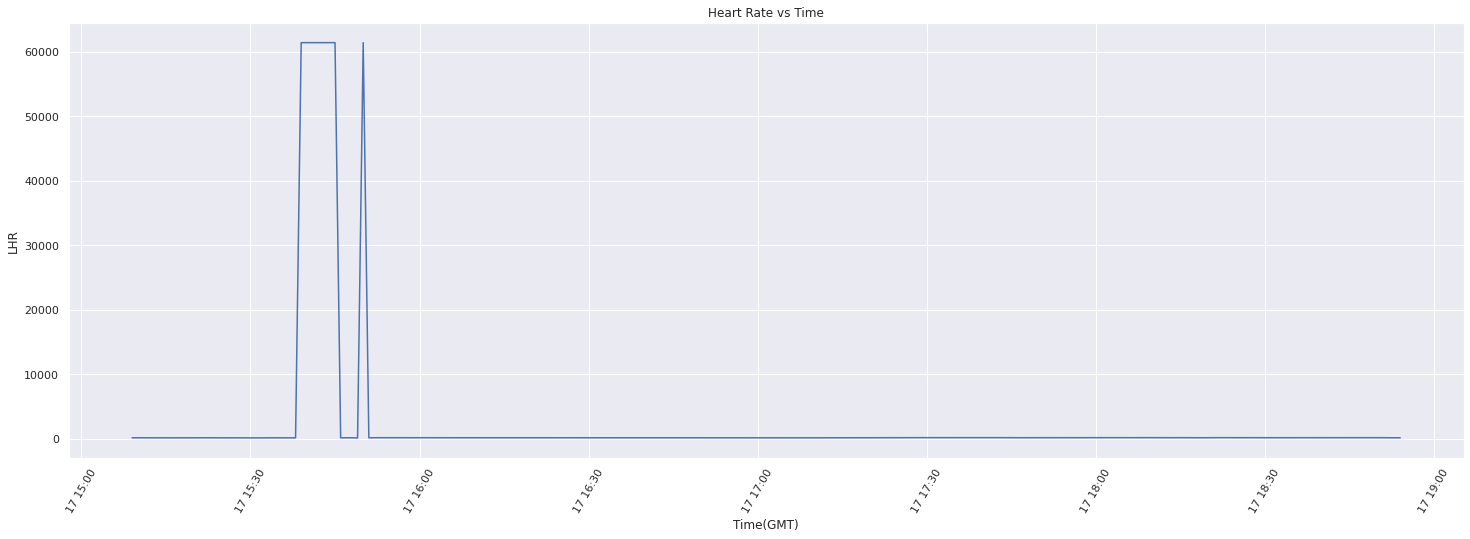

In [6]:
#xAxis = pd.to_datetime(dataframe['Time'])
#yAxis = dataframe['LHR']
plt.figure(figsize=(25,8))
plt.plot( dataframe['LHR'])
plt.title('Heart Rate vs Time')
plt.xlabel('Time(GMT)')
plt.xticks(rotation=60)
plt.ylabel('LHR')
plt.show()

**As we can see there are very high values in our dataset so we have to balance them first. for that we are going to take the mode of Lifetouch Heart Rate**

In [8]:
mod = dataframe['LHR'].mode().iat[0]
print(mod)

136


**Replacing the high values with the mode**

In [9]:
# Limiting the columns we need
df = dataframe[['LHR']]
df.loc[(df['LHR'] >= 300),'LHR']=mod

df.describe()

,LHR
count,226.000000
mean,145.513274
std,11.277994
min,106.000000
25%,136.000000
50%,142.000000
75%,155.000000
max,172.000000


In [10]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
df

,LHR
Timestamp (GMT),
2015-08-17 15:09:00,139
2015-08-17 15:10:00,144
2015-08-17 15:11:00,140
2015-08-17 15:12:00,138
2015-08-17 15:13:00,133
2015-08-17 15:14:00,132
2015-08-17 15:15:00,132
2015-08-17 15:16:00,133
2015-08-17 15:17:00,136


**Plotting the graph**

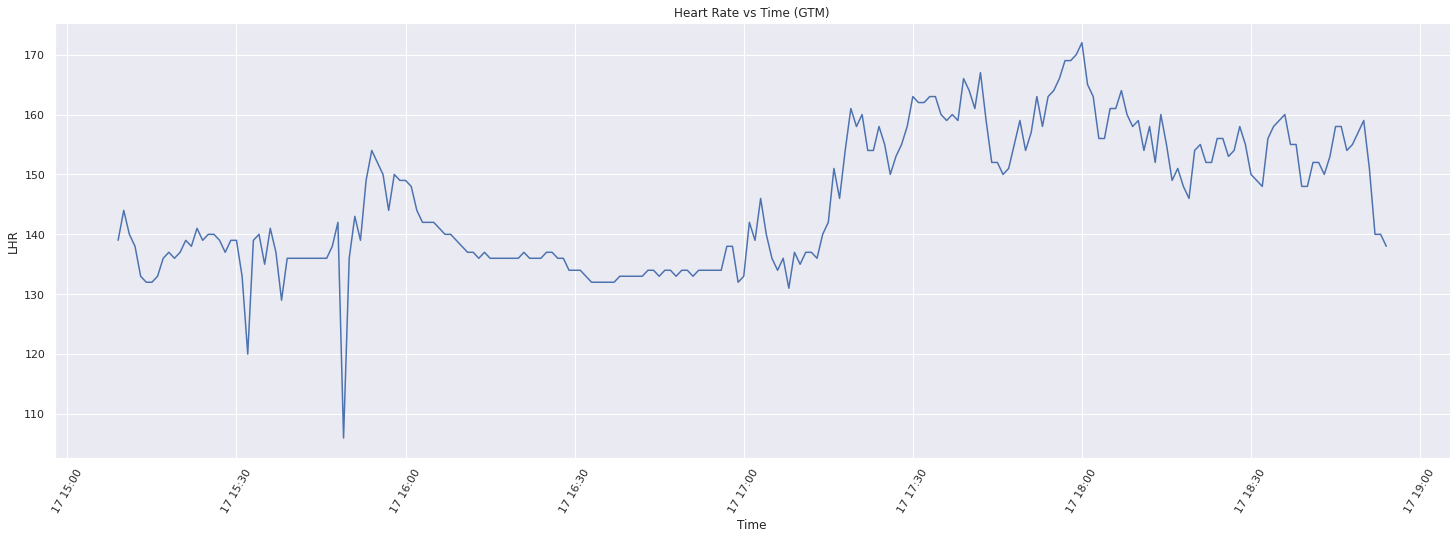

In [11]:
plt.figure(figsize=(25,8))
plt.plot(df)
plt.title('Heart Rate vs Time (GTM)')
plt.xlabel('Time')
plt.xticks(rotation=60)
plt.ylabel('LHR')
plt.show()

**Plotting the dot graph**

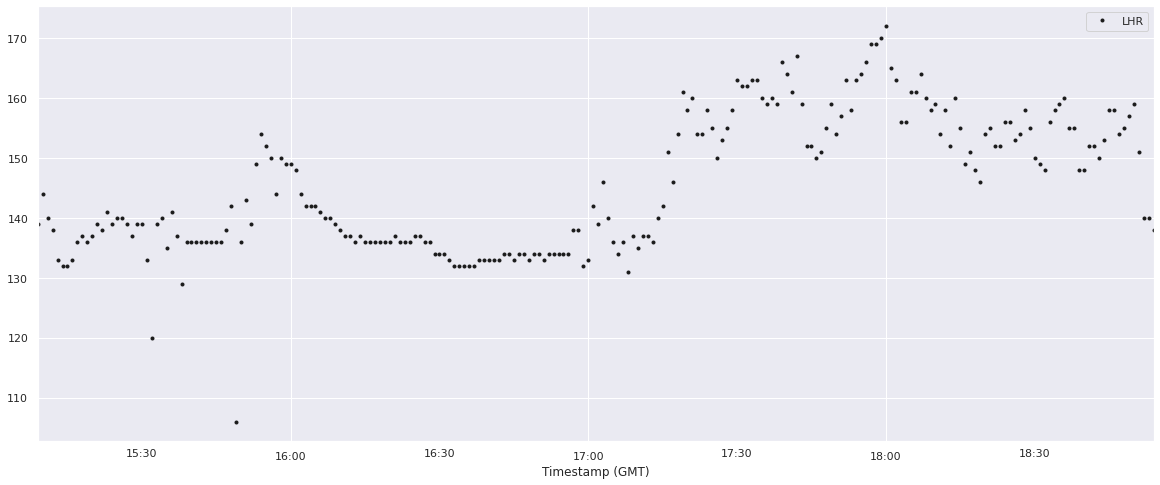

In [12]:
df.plot(figsize=(20,8), style="k.")

**As we see there are three values in the graph that are below 130. Lets replace them with the average value to balance the graph**

In [13]:
_mean = int(df["LHR"].mean())
df.loc[(df['LHR'] < 130),'LHR'] = _mean

**Plotting the graph**

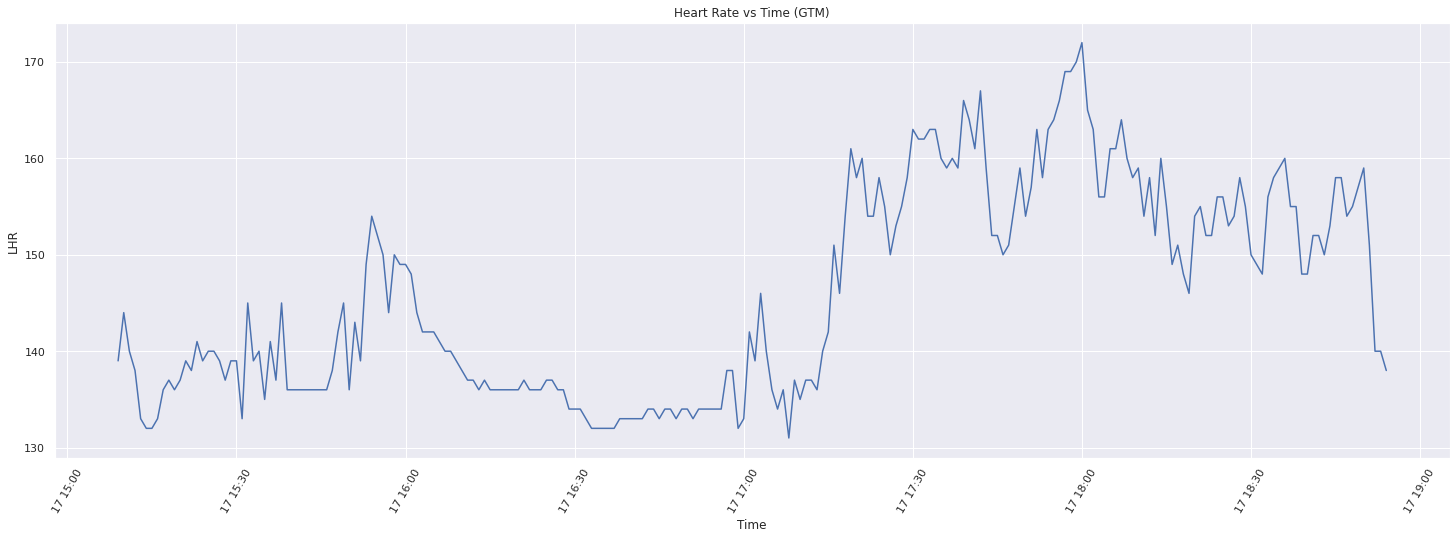

In [14]:
plt.figure(figsize=(25,8))
plt.plot(df)
plt.title('Heart Rate vs Time (GTM)')
plt.xlabel('Time')
plt.xticks(rotation=60)
plt.ylabel('LHR')
plt.show()

**Let's check the stationarity of the series**

In [15]:
def check_stationarity(series):
  statistic, p_value, n_lags, critical_values = sm.tsa.stattools.kpss(series)
  print(f'p value: {p_value}')
  print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary \n')

In [16]:
check_stationarity(df['LHR'])

p value: 0.01
Result: The series is not stationary 



In [17]:
split = len(df) - int(0.2*len(df))
print(f'Use {split} rows for training data')
print(f'Use {len(df) - split} rows for testiing data')
train = df[0:split]
test = df[split:]


print('Ttrain Data Shape', train.shape)
print('Test Data Shape', test.shape)

Use 181 rows for training data
Use 45 rows for testiing data
Ttrain Data Shape (181, 1)
Test Data Shape (45, 1)


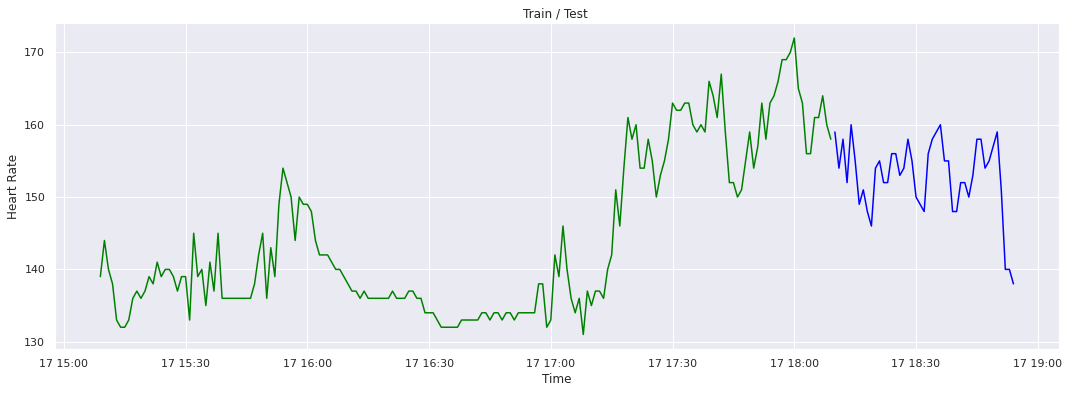

In [18]:
plt.figure(figsize=(18, 6))
plt.plot(train, color = "green")
plt.plot(test, color = "blue")
plt.ylabel('Heart Rate')
plt.xlabel('Time')
plt.title("Train / Test ")
plt.show()

**finding 'q' for model**

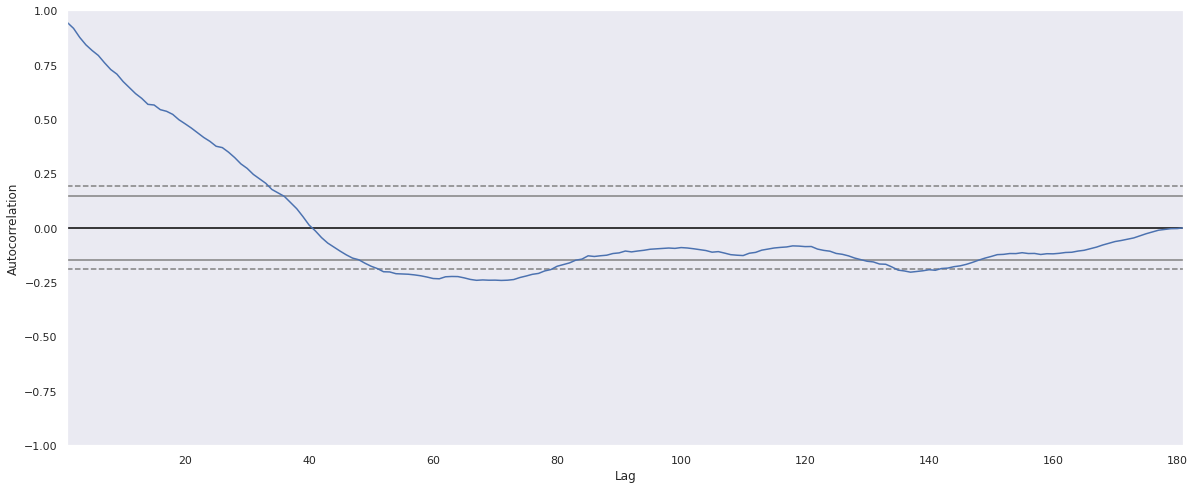

In [25]:
plt.rc("figure", figsize=(20,8))
pd.plotting.autocorrelation_plot(train)

**finding 'p' for model**

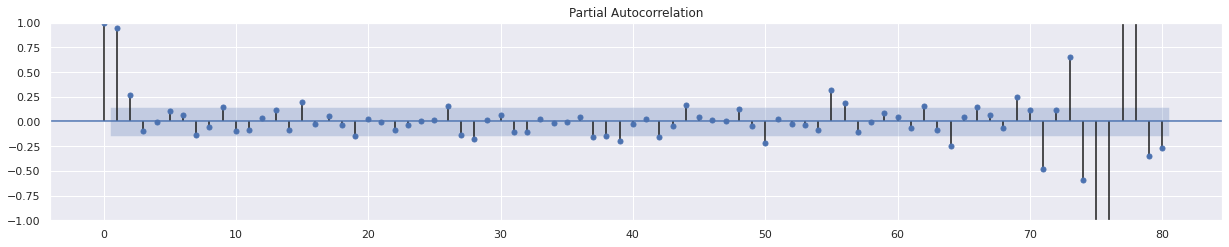

In [53]:
fig = plt.figure(figsize=(21,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_pacf(train, lags=80, ax=ax1)

**Finding the best value for ARIMA**

In [54]:
import itertools
p = range(45,50)
d = range(0,3)
# q = range(45,50)
q = [2,7,9,15,19]

pdq_list = list(itertools.product(p,d,q))

params = []
all_aic = []
all_error = []

for pdq in pdq_list:
  try:
    arima = sm.tsa.arima.ARIMA(train, order=pdq)
    arima_fit = arima.fit()

    prediction = arima_fit.predict(start = len(train), end = test.index[-1])

    params.append(pdq)
    all_aic.append(arima_fit.aic)

    error = mean_squared_error(test['LHR'].values, prediction.values, squared=False)
    all_error.append(error)
  except:
    continue

In [55]:
for i in range(0,len(params)):
  if all_aic[i] == min(all_aic):
    min_error, best_param, min_AIC = all_error[i], params[i], all_aic[i]
    print('The optimal param is:')
    print(min_error, best_param, min_AIC)

The optimal param is:
6.798993252816908 (45, 1, 2) 993.4858640254517


**As we know that the best values for p,d and q are 45, 1 and 2 respectively**

**Training the model on the best values**

In [56]:
arima = sm.tsa.arima.ARIMA(train, order = best_param)
arima_fit = arima.fit()

forecast = arima_fit.predict(start = len(train), end = test.index[-1])

In [110]:
from numpy import sqrt

aic = arima_fit.aic

# 'squared=False' mean take square root using mean_squared_error method
rms_error = mean_squared_error(test['LHR'].values, forecast.values, squared=False)

print("Akaike's Information Criterion (AIC): " + str(aic), "\nRoot Mean Square Error (RMSE): " + str(error))

Akaike's Information Criterion (AIC): 993.4858640254517 
Root Mean Square Error (RMSE): 6.798993252816908


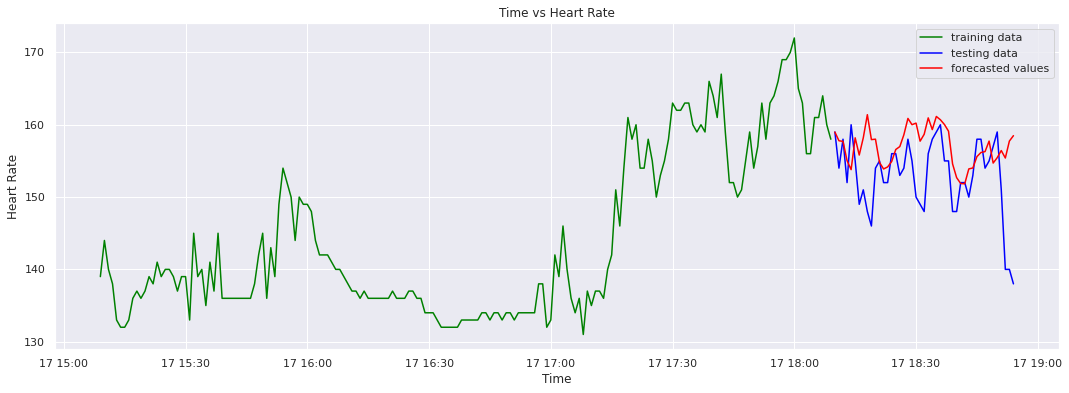

In [102]:
plt.figure(figsize=(18, 6))
plt.plot(train, color = "green", label="training data")
plt.plot(test, color = "blue", label="testing data")
plt.plot(forecast, color = "red", label="forecasted values")
plt.ylabel('Heart Rate')
plt.xlabel('Time')
plt.title("Time vs Heart Rate")
plt.legend()

**Predicting the next 20 values using the model we trained**

In [75]:
prediction = arima_fit.predict(start = len(df), end = len(df) + 20)

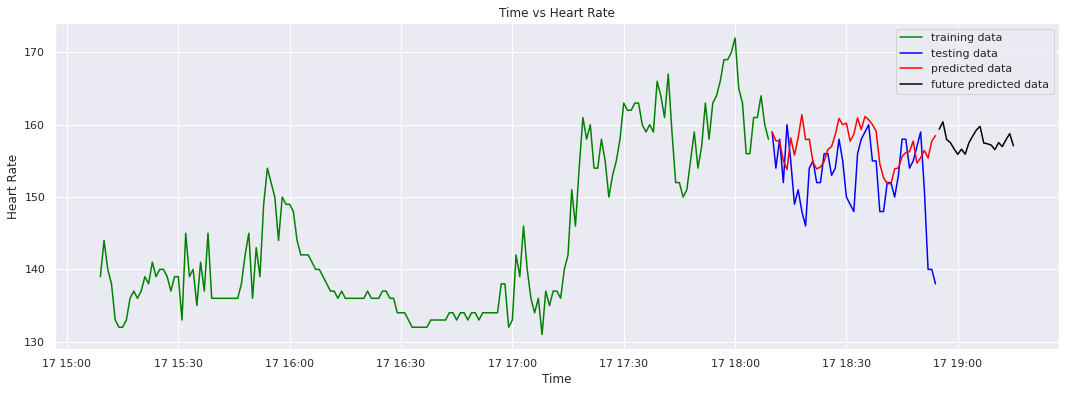

In [105]:
plt.figure(figsize=(18, 6))
plt.plot(train, color = "green", label="training data")
plt.plot(test, color = "blue", label="testing data")
plt.plot(forecast, color = "red", label="predicted data")
plt.plot(prediction, color = "black", label="future predicted data")
plt.ylabel('Heart Rate')
plt.xlabel('Time')
plt.title("Time vs Heart Rate")
plt.legend()

In [108]:
new_df = pd.DataFrame([], columns=['Time', 'LHR'])

new_df['LHR'] = prediction.round(0).astype(int)
new_df['Time'] = new_df.index
new_df.reset_index(drop=True, inplace=True)
new_df.to_csv('new_LHR_predictions.csv', header=True)